<h1>
    Mathematische Modelle zur Beschreibung der COVID-19-Pandemie in Deutschland
</h1>

von **Ingo Dahn (dahn@dahn-research.eu)**

# Was ist ein Jupyter Notebook?

Dies ist ein Jupyter-Notebook, das vor allem für die selbständige, interaktive Arbeit gedacht ist, das aber auch gerne in der Lehre eingesetzt werden kann. Mit diesem Notebook kann der Leser die Grundlagen von drei wichtigen epidemiologischen Modellen verstehen, aber - und das macht Jupyter-Notebooks zu etwas Besonderem - er/sie kann dadurch aktiv mit den Daten zur Ausbreitung von COVID-19 arbeiten und so die Leistungsfähigkeit und die Grenzen der behandelten mathematischen Modelle erfahren.

Anders als in einem Lehrbuch können Sie die durchgeführten Berechnungen ausführen, sie modifizieren und sie auf andere Daten (vielleicht für ein anderes Land?) anwenden. Sie würden manche Berechnungen anders durchführen oder würden gerne zusätzliche Analysen durchführen? Sehr gut! Tun Sie es einfach, ändern Sie die Berechnungen, fügen Sie neue Zellen hinzu - Sie können nichts kaputt machen!

Zusätzlich enthält dieses Notebook einige interaktive Aufgaben, in denen Sie mit Hilfe der Modelle eigene Voraussagen treffen können, deren Gültigkeit dann automatisch bewertet wird (nur für Sie - die Bewertung wird nirgends gespeichert).

Eine gute Online-Umgebung, um mit Jupyter-Notebooks wie diesem zu arbeiten, ist das [CoCalc-System](https://cocalc.com). Wenn Sie etwas Zeit haben und auf die interaktiven Aufgaben verzichten können, so können Sie auch das [Binder-System](https://mybinder.org/v2/gh/ingodahn/Corona/master?filepath=Deutschland.ipynb) verwenden. Dieses Notebook verwendet übrigens den Kernel SageMath 9.0.

Schließlich können Sie mit diesem Notebook auch im [CoCalc-Player](https://dahn-research.eu/corona/Deutschland.html) interaktiv arbeiten.

**Praktische Hinweise**

In der ausführbaren Ansicht dieses Notebooks in CoCalc bzw. im CoCalc-Player können die Eingabezellen editiert und neu berechnet werden um die Verfahren zu prüfen oder sie auf andere Daten anzuwenden.Viele Zellen haben Schieberegler, mit denen Parameter der Berechnung angepasst werden können. Jede Neuberechnung einer Zelle ändert möglicherweise Daten oder Definitionen, die andere Zellen verwenden

**Deshalb müssen die Zellen immer in der gegebenen Reihenfolge ausgeführt werden!**

**Um eine Zelle auszuführen wählen Sie die Zelle aus und verwenden Sie die Tastenkombination Shift+Return.**

Falls Sie Verbesserungsvorschläge,  Modifikationen, Erweiterungen oder Anwendungen auf andere Daten haben oder einfach nur dieses Notebook nutzen, so würde ich mich über eine Information dazu freuen.

Diese Seite wird unter der [Creative Commons Lizenz CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) veröffentlicht. Dieses Notebook ist auf [GitHub](https://github.com/ingodahn/Corona) verfügbar.

Koblenz im Juli 2020

Dr. Ingo Dahn



# Inhalt

**_Wie gut beschreiben mathematische Modelle reale Prozesse?_** 

In diesem Jupyter-Notebook untersuchen wir die Passung der einfachsten Pandemie-Modelle - des exponentiellen Modells, des SI-Modells und des SIR-Modells - zu den Daten der Pandemie in Deutschland für die Zeit vom 24.2. bis zum 30.6.2020, wie sie vom Robert-Koch-Institut zur Verfügung gestellt wurden. 

Zunächst wird ein Überblick über die verwendeten Daten zur Entwicklung der COVID-19-Pandemie gegeben. Es werden taggenaue Daten für COVID-19-Infektionen, -Todesfälle und -Genesungen verwendet.

Der Hauptteil zu den mathematischen Modellen diskutiert zunächst die Frage, wie die Qualität eines (nichtlinearen) mathematischen Modells beurteilt werden kann. Wir definieren dafür die Modell-Toleranz und die Vorhersage-Toleranz, die 
auf der Berechnung relativer Residuen beruhen.

Danach werden für jedes der drei behandelten Modelle die Überlegungen vorgestellt, die hinter dem jeweiligen Modellansatz stehen und die zur Bestimmung der jeweils dem Modell zugrundeliegenden Differentialgleichungen führen.

Danach versuchen wir, geeignete Werte der Parameter für die einzelnen Modelle zu bestimmen, so dass die Modelle den Verlauf der Pandemie - zumindest in einem gewissen Zeitabschnitt - möglichst gut beschreiben und sinnvolle Vorhersagen ermöglichen.

Für das Verständnis des exponentiellen Modells sind elementare Kenntnisse über Exponentialfunktionen ausreichend, wenn die automatische Bestimmung der Parameter hingenommen wird.

Das logistische Modell beruht auf der Kenntnis der logistischen Funktion, die in diesem Kapitel eingeführt wird. Auch für das logistische Modell kann die Bestimmung geeigneter Parameter automatisch erfolgen. Dabei werden wir sehen, wie das Modell laufend durch Änderungen an den Parametern angepasst werden muss bis es schließlich Anfang Mai 2020 seine Grenzen erreicht. Für das Verständnis des logistischen Modells sind elementare Kenntnisse über Differentialgleichungen hilfreich, jedoch nicht zwingend erforderlich.

Die Anwendung des SIR-Modell auf die Modellierung der COVID-19-Pandemie erfordert schließlich ein gewisses Verständnis für ein System von Differentialgleichungen und dessen näherungsweise numerische Lösung mit dem Runge-Kutta-Verfahren.

Ein abschließendes Fazit fasst die Ergebnisse zusammen und ein Ausblick zeigt Möglichkeiten, dieses Notebook (selbst) weiterzuentwickeln.

# Daten

Im Folgenden wird statt mit Kalender-Daten, mit Tagen seit dem 24.2.2020, dem Beginn der täglichen Datenemeldungen des Robert-Koch-Instituts gerechnet. Die folgende Tabelle ermöglicht eine Umrechnung.

<table>
    <thead>
        <th>
           Tag Nr.
        </th>
        <th>
            Datum
        </th>
    </thead>
    <tbody>
        <tr>
            <td>0</td><td>24.2.2020</td>
        </tr>
        <tr>
            <td>20</td><td>15.3.2020</td>
        </tr>
        <tr>
            <td>40</td><td>4.4.2020</td>
        </tr>
        <tr>
            <td>60</td><td>24.4.2020</td>
        </tr>
        <tr>
            <td>80</td><td>14.5.2020</td>
        </tr>
        <tr>
            <td>100</td><td>3.6.2020</td>
        </tr>
        <tr>
            <td>120</td><td>23.6.2020</td>
        </tr>
        <tr>
            <td>140</td><td>13.7.2020</td>
        </tr>
    </tbody>
</table>

In [2]:
infections_de=[16.0, 18.0, 21.0, 26.0, 53.0, 66.0, 117.0, 150.0, 188.0, 240.0, 400.0, 639.0, 795.0, 902.0, 1139.0, 1296.0, 1567.0, 2369.0, 3062.0, 3795.0, 4838.0, 6012.0, 7156.0, 8198.0, 10999.0, 13957.0, 16662.0, 18610.0, 22672.0, 27436.0, 31554.0, 36508.0, 42288.0, 48582.0, 52547.0, 57298.0, 61913.0, 67366.0, 73522.0, 79696.0, 85778.0, 91714.0, 95391.0, 99225.0, 103228.0, 108202.0, 113525.0, 117658.0, 120479.0, 123016.0, 125098.0, 127584.0, 130450.0, 133830.0, 137439.0, 139897.0, 141672.0, 143457.0, 145694.0, 148046.0, 150383.0, 152438.0, 154175.0, 155193.0, 156337.0, 157641.0, 159119.0, 160758.0, 161703.0, 162496.0, 163175.0, 163860.0, 164807.0, 166091.0, 167300.0, 168531.0, 169218.0, 169575.0, 170508.0, 171306.0, 172239.0, 173152.0, 173772.0, 174355.0, 174697.0, 175210.0, 176007.0, 176752.0, 177212.0, 177850.0, 178281.0, 178570.0, 179002.0, 179364.0, 179717.0, 180458.0, 181196.0, 181482.0, 181815.0, 182028.0, 182370.0, 182764.0, 182937.0, 183271.0, 183979.0, 184193.0, 184543.0, 184861.0, 185416.0, 185674.0, 186022.0, 186269.0, 186461.0, 186839.0, 187184.0, 187764.0, 188534.0, 189135.0, 189822.0, 190359.0, 190862.0, 191449.0, 192079.0, 192556.0, 193243.0, 193499.0, 193761.0, 194259.0]
dataNr_de=len(infections_de)
deadsAll_de=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 20.0, 31.0, 46.0, 55.0, 86.0, 114.0, 149.0, 198.0, 253.0, 325.0, 389.0, 455.0, 583.0, 732.0, 872.0, 1017.0, 1158.0, 1342.0, 1434.0, 1607.0, 1861.0, 2107.0, 2373.0, 2544.0, 2673.0, 2799.0, 2969.0, 3254.0, 3569.0, 3868.0, 4110.0, 4294.0, 4404.0, 4598.0, 4879.0, 5094.0, 5321.0, 5500.0, 5640.0, 5750.0, 5913.0, 6115.0, 6288.0, 6481.0, 6575.0, 6649.0, 6692.0, 6831.0, 6996.0, 7119.0, 7266.0, 7369.0, 7395.0, 7417.0, 7533.0, 7634.0, 7723.0, 7824.0, 7881.0, 7914.0, 7935.0, 8007.0, 8090.0, 8147.0, 8174.0, 8216.0, 8247.0, 8257.0, 8302.0, 8349.0, 8411.0, 8450.0, 8489.0, 8500.0, 8511.0, 8522.0, 8551.0, 8581.0, 8614.0, 8646.0, 8668.0, 8674.0, 8711.0, 8729.0, 8755.0, 8763.0, 8781.0, 8787.0, 8791.0, 8800.0, 8830.0, 8856.0, 8872.0, 8883.0, 8882.0, 8885.0, 8895.0, 8914.0, 8927.0, 8948.0, 8954.0, 8957.0, 8961.0, 8973.0)
deads_de=list(deadsAll_de)[23:dataNr_de]
maxDays=dataNr_de+3
deadsNr_de=len(deads_de)
infections_de_points=[(n,infections_de[n]) for n in range(0,dataNr_de)]
recoveredAll_de=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13500.0, 16100.0, 18700.0, 21400.0, 23800.0, 26400.0, 28700.0, 30600.0, 33000.0, 46300.0, 49000.0, 53913.0, 57400.0, 60200.0, 64300.0, 68200.0, 72600.0, 77000.0, 81800.0, 85400.0, 88000.0, 91500.0, 95200.0, 99400.0, 103300.0, 106800.0, 109800.0, 112000.0, 114500.0, 117400.0, 120400.0, 123500.0, 126900.0, 129000.0, 130600.0, 132700.0, 135100.0, 137400.0, 139900.0, 141700.0, 143300.0, 144400.0, 145600.0, 147200.0, 148700.0, 150300.0, 151700.0, 152600.0, 153400.0, 154600.0, 155700.0, 156900.0, 158000.0, 159000.0, 159900.0, 160500.0, 161200.0, 162000.0, 162800.0, 163200.0, 164100.0, 164900.0, 165200.0, 165900.0, 166400.0, 167300.0, 167800.0, 168300.0, 168800.0, 169100.0, 169600.0, 170200.0, 170700.0, 171100.0, 171600.0, 171900.0, 172200.0, 172650.0, 173100.0, 173600.0, 174100.0, 174400.0, 174700.0, 174900.0, 175300.0, 175700.0, 176300.0, 176800.0, 177100.0, 177500.0, 177700.0, 178100.0, 179100.0)
recovered_de=list(recoveredAll_de)[35:dataNr_de]
recoveredNr_de=len(recovered_de)
date0='240220'
from IPython.display import Markdown as md
from datetime import *
from dateutil import *
from dateutil.relativedelta import relativedelta
firstDateTime_de=datetime(2020,2,24)
lastDateTime_de=firstDateTime_de+relativedelta(days=int(dataNr_de-1))
lastDate_de=lastDateTime_de.strftime('%d.%m.%Y')
html(u"Die Daten sind aktuell bis zum %s."%(lastDate_de))

Die Daten sind aktuell bis zum 30.06.2020.

Es stehen taggenaue Meldungen des RKI zu
* gemeldeten Infektionen
* geschätzte Genesungen (auf volle 100 gerundet)
* gemeldete Todesfälle

zur Verfügung. Wir gehen davon aus, dass die absolute Zahl der der Todesfälle realistisch ist, während die Zahlen der realen Infektionen bzw. Genesungen nicht einmal von der Größenordnung her abgeschätzt werden kann, solange keine repräsentativen Querschnittsanalysen vorliegen. Die dazu gemeldeten bzw. geschätzten Zahlen erlauben lediglich das Erkennen von Tendenzen. deshalb stellen wir im Folgenden Diagramm, für eine erste Orientierung, die zur Verfügung stehenden kumulierten Daten auf ihren maximalen Wert normiert dar.

Auch in den folgenden Abschnitten arbeiten wir direkt mit den gemeldeten Daten. Der Leser ist jedoch eingeladen, die Infektionszahlen mit einem Dunkelfaktor seiner Wahl zu multiplizieren (5-15 gelten als realistische Faktoren) und die Modelle neu berechnen zu lassen.

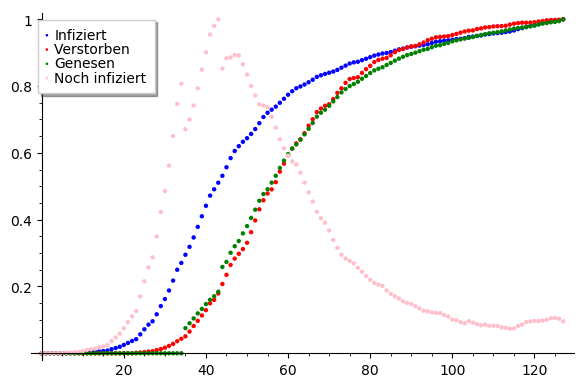

In [3]:
def normedPoints(data):
    maxData=max(data)
    return [(n,data[n]/maxData) for n in range(0,len(data))]
infectionsNormedPoints_de=normedPoints(infections_de)
deadsNormedPoints_de=normedPoints(deadsAll_de)
recoveredNormedPoints_de=normedPoints(recoveredAll_de)
yetInfected_de=[infections_de[n]-recoveredAll_de[n] - deadsAll_de[n] for n in range(0,dataNr_de)]
yetInfectedNormedPoints_de=normedPoints(yetInfected_de)
list_plot(infectionsNormedPoints_de, legend_label='Infiziert', color='blue')+list_plot(deadsNormedPoints_de,color='red',legend_label='Verstorben')+list_plot(recoveredNormedPoints_de,color='green',legend_label='Genesen')+list_plot(yetInfectedNormedPoints_de,color='pink',legend_label='Noch infiziert')

## Reproduktionsrate

Hauptziel der Massnahmen zur Eindämmung der Pandemie ist zunächst, eine Überlastung der Intensivpflege in den deutschen Krankenhäusern (ohne zusätzliche Ressourcen) zu verhindern. Dazu müsste die Reproduktionsrate des Virus, d.h. die Zahl der von einem Infizierten angesteckten Personen nach Einschätzung der Deutschen Gesellschaft für Epidemiologie auf 1.1-1.2 gesenkt werden.

Im epidemiologischen Bulletin des RKI vom 17.4.2020 ist der folgende Weg zur Schätzung der Reproduktionsrate beschrieben. Sie beruht auf einer Schätzung der sogenannten Generationenzahl, d.i. die Zahl zwischen dem Beginn der Infektion eines Patienten und dem Beginn der Infektion eines von ihm angesteckten Patienten. Die Generationenzahl wird aufgrund des typischen Verlaufs der Infektion mit 4 Tagen angesetzt.

Dann kann die Reproduktionszahl geschätzt werden als Quotient der Anzahl der Neuerkrankungen in 2 aufeinanderfolgenden Perioden von der Länge der Generationenzahl, also $R(n)=\frac{i(n)-i(n-4)}{i(n-4)-i(n-8)}$, wobei $i(n)$ die Zahl der Infizierten am Tag $n$ ist..

Im folgenden Diagramm kann die für die Berechnung der Reproduktionszahl verwendete Generationenzahl variiert werden. Es wird mit dem Durchschnitt der Infektionszahlen der letzten $w$ Tage gerechnet.

In [4]:
@interact
def _(w=slider(1,15,step_size=1,default=7),Gz=slider(1,15,step_size=1,default=4)):
    Id=[(infections_de[n]+infections_de[n-w+1])/2 for n in range(w,dataNr_de)]
    #R=[(n,((infections_de[n]-infections_de[n-Gz])/(infections_de[n-Gz]-infections_de[n-2*Gz])).n()) for n in range(2*Gz,dataNr_de)]
    R=[(n,((Id[n-w-1]-Id[n-w-1-Gz])/(Id[n-w-1-Gz]-Id[n-w-1-2*Gz])).n()) for n in range(w+2*Gz,dataNr_de)]
    show(list_plot(R)+plot(1,(0,dataNr_de),color='black'))
    

Interactive function <function _ at 0x7efd69337620> with 2 widgets
  w: TransformIntSlider(value=7, descriptio…

## Neuinfektionen

Das folgende Diagramm zeigt für jeden Tag die Zahl der gemeldeten Neuinfektionen pro Tag, gemittelt über die letzten $w$ Tage.

In [5]:
@interact
def _(w=slider(1,14,step_size=1,default=1)):
    k_n_de = [(n,(infections_de[n]-infections_de[n-w])/w) for n in range(w,dataNr_de)]
    show(list_plot(k_n_de))

Interactive function <function _ at 0x7efd692ece18> with 1 widget
  w: TransformIntSlider(value=1, description…

## Todesfälle

Das folgende Diagramm zeigt für jeden Tag die Zahl der gemeldeten COVID-19-Todesfälle pro Tag, gemittelt über die letzten $w$ Tage.

In [6]:
@interact
def _(w=slider(1,14,step_size=1,default=1)):
    k_n_de = [(n,(deadsAll_de[n]-deadsAll_de[n-w])/w) for n in range(w,dataNr_de)]
    show(list_plot(k_n_de))

Interactive function <function _ at 0x7efd670f4d08> with 1 widget
  w: TransformIntSlider(value=1, description…

# Mathematische Modelle

Wir suchen mathematische Funktionen, die den Verlauf der Pandemie möglichst gut beschreiben. Wie wir sehen werden, kann man in der ersten Phase (etwa bis Ende März 2020) dafür Exponentialfunktionen verwenden. In dieser Zeit breitet sich das Virus weitgehend ungehemmt aus. Im April beginnen hemmende Faktoren zu wirken, vermutlich vor allem Kontaktbeschränkungen, die die Ausbreitungsgeschwindigkeit verlangsamen. In dieser Phase liefern logistische Funktionen brauchbare Ergebnisse für die Beschreibung der Entwicklung der Zahl der Infizierten bzw. Verstorbenen.

Wie wir sehen schwanken die Daten der Neuinfektionen und Todesfälle von Tag zu Tag erheblich. Wir werden im Folgenden stets mit kumulierten Daten Arbeiten. Gegenüber diesen Daten sind die täglichen Schwankungen vergleichsweise klein, weshalb wir auf eine Mittelung zum Ausgleich der täglichen Schwankungen verzichten.

Bei der Interpretation der Ergebnisse ist zu berücksichtigen, dass die Daten mit einer erheblichen Ungenauigkeit behaftet sind, da bei Weitem nicht alle Erkrankten Symptome zeigen und deshalb in dem untersuchten Zeitraum gar nicht erfasst wurden. Solange das Testregime dabei bleibt, vorwiegend Personen mit Symptomen zu testen, wie das im März und April der Fall war, können wir annehmen, dass sich die Zahl der Infizierten von der Zahl der gemeldeten um einen unbekannten Dunkelfaktor unterscheidet. Insofern sind in der folgenden Analyse weniger die absoluten Zahlen als deren relative Unterschiede und deren Entwicklung von Interesse.

Wir wollen untersuchen, wie genau sich die reale Entwicklung der Zahl der mit COVID-19 Infizierten in Deutschland mit den verfügbaren mathematischen Modellen vorhersagen ließ. 

**Aufgabe:** Führen Sie eine ähnliche Analyse für die Zahl der Todesfälle mit COVID-19-Bezug durch. Sie können dazu die Code-Zellen in diesem Notebook so modifizieren, dass Sie statt `infections_de` die Liste `deads_de` verwenden. Vergleichen Sie die beiden Analysen!

Versuchen Sie zunächst eine Vorhersage "von Hand":

<iframe src="https://netmath.vcrp.de/IMathAS/embedq.php?theme=netmath&id=7635" width="100%" height="800px"></iframe>

## Qualität der Modelle

Die zu erwartende Genauigkeit einer Vorhersage hängt offenbar vom Zeithorizont $zh$ der Voraussage ab - davon, über wie viele Tage im Voraus eine Aussage gemacht werden soll. Den Zeithorizont, mit dem im Folgenden gerechnet wird, können Sie mit diesem Regler festlegen.

In [47]:
zh=3
@interact
def _(zhs=slider(1,14,step_size=1,default=3,label='zh (Tage)')):
    global zh
    zh=zhs
    show(html("Der Zeithorizont für die Vorhersagen betr&auml;gt %i Tage."%(zh)))

Interactive function <function _ at 0x7efd5a24d950> with 1 widget
  zhs: TransformIntSlider(value=3, descripti…

Es ist umstritten, wie die Passung einer nichtlinearen Regressionsfunktion $f$ zu einer gegebenen Datenreihe `dataP` am Besten definiert wird. Die Datenreihe der kumulierten Infektionszahlen weist Daten mit erheblichen Größenunterschieden auf. Bei größeren absoluten Werten der Daten erscheint auch eine größere absolute Abweichung der Funktionswerte von den Daten als akzeptable. Deshalb messen wir die Qualität der Regression hier mit dem relativen Residuum `rR2(dataP,f)`, das wie folgt definiert wird. 

Ist $\vec{vd}$ der Vektor der beobachteten Daten und $\vec{vf}$ der Vektor der entsprechenden Funktionswerte der Funktion $f$, so definieren wir $rR2(\vec{vd},f)=\frac{\|\vec{vd}-\vec{vf}\|}{\|\vec{vd}\|}$. Je geringer dieser Wert desto genauer die Approximation.

Das relative Residuum ist zu einem gegebenen Zeitpunkt $x$ für zwei Bereiche von Interesse.
* Für den Bereich der Trainingsdaten von $0$ bis $x$ zur Beschreibung der Passgenauigkeit des Modells und
* Für den Vorhersagebereich von $x+1$ bis $x+zh$ zur Einschätzung der Vorhersagequalität.
Deshalb definieren wir noch $rR3(\vec{vd},f,x_0,x_1)=rR2(\vec{vd}|[x_0,x_1],f|[x_0,x_1])$, d.h. wir schränken die Argumente von $rR2$ auf den Bereich $[x_0,x_1]$ ein, insbesondere für $x_0=0,x_1=x$ und $x_0=x+1,x_1=x+zh$.

Damit wird die Modelltoleranz $MT(\vec{vd},f,x)=rR3(\vec{vd},f,0,x)$ und die Vorhersagetoleranz $VT(\vec{vd},f,x,zh)=rR3(\vec{vd},f,x+1,x+zh)$. Je kleiner diese Werte sind, desto besser beschreibt das Modell die Trainigsdaten bzw. desto besser ist die Vorhersage.

Es sei zugegeben, dass in der Wahl dieser Definitionen eine gewisse Willkür steckt. **Der Leser wird deshalb ausdrücklich ermutigt, die Definitionen in der folgenden Zelle durch eigene zu ersetzen!**

In [34]:
# Definition Residuum
def R2(dataP,f):
    return (vector([(p[1]-f(p[0])) for p in dataP]).norm().n())^2
#Definition Residuum mit relativem Fehler
def rR2(dataP,f):
    return vector(RR,[p[1]-f(p[0]) for p in dataP]).norm()/vector(RR,[p[1] for p in dataP]).norm()
def rR3(dataP,f,x0,x1):
    return rR2(dataP[x0:x1+1],f)
#Definition Modell-Toleranz
def MT(dataP,f,x):
    return rR3(dataP,f,0,x)
#Definition Vorhersage-Toleranz
def VT(dataP,f,x,z):
    return rR3(dataP,f,x,x+z)
html("Residuen sind definiert")

Residuen sind definiert

## Exponentielles Modell

In der ersten Phase der Epidemie, etwa bis zum 31.3.2020 (Tag 36), beschreibt ein einfaches Modell des exponentiellen Wachstums die Entwicklung der Zahl der vom Robert-Koch-Institut gemeldeten Infektionsfälle recht gut. Die realen Fallzahlen schwanken in geringem Maße um den Verlauf einer approximierenden Exponentialfunktion. Wie wir sehen werden, wird die Abweichung Ende März größer als die vorherige zufällige Schwankungsbreite - das Modell eines exponentiellen Verlaufs stößt an seine Grenzen.

Das exponentielle Modell geht von der einzigen Annahme aus, dass die Zahl der Neuinfektionen in einem kleinen Zeitraum $\Delta x$ proportional ist zur Zahl der zu Beginn Infizierten $I(x)$ und zur Länge des Zeitraums:

$I(x+\Delta x) = c\cdot \Delta x \cdot I(x)$.

$c$ ist dabei proportional zur Wahrscheinlichkeit, dass sich eine Person infiziert. Für $\Delta x \rightarrow 0$ ergibt sich daraus die Differentialgleichung $I'=c\cdot I(x)$ mit der Lösung $I(x)=ae^{cx}$, wobei $a=I(0)$ der Anfangswert ist. $c$ bestimmt, wie steil die Exponentialfunktion ansteigt.

Das exponentielle Modell beschreibt ein ungehemmtes und unbegrenztes Wachstum und vernachlässigt Genesungen - wie wir sehen werden in der Anfangsphase der Pandemie durchaus zu Recht.

Für die Berechnung der passenden Parameter $a,c$ stellt uns SageMath die funktion`find_fit` zur Verfügung. Diese Funktion versucht mittels Regressionsverfahren eine Funktion zu finden, die möglichst gut zu den gegebenen Werten passt.

### Zahl der Infektionen

Das folgende Diagramm zeigt die kumulierte Zahl der Infektionen in Deutschland nach Angaben des Robert-Koch-Instituts vom 24.2.2020 (Tag 0) bis zu dem mit dem Schieberegler bestimmten Tag (grüne Linie). Die rote Kurve stellt eine Exponentialfunktion dar, die den Verlauf der Infektionszahlen bis zu diesem Tag möglichst gut approximiert und für den gewählten Zeithorizont `zh` darüber hinaus. Für diesen Tag werden Modell-Tolearanz und Vorhersage-Toleranz angezeigt.

In [9]:
dataExpNr_de=37
@interact
def _(Tag=slider(7,36,default=20,step_size=1)):
    infectionsTag=infections_de_points[0:Tag+zh+1]
    var('x,a,c')
    f_exp(x)=a*e^(c*x)
    q=find_fit(infectionsTag[0:Tag+1], f_exp, solution_dict = True)
    show(f_exp(a=q[a],c=q[c]))
    g(x)=f_exp(x,a=q[a],c=q[c])
    show("Modell-Toleranz:",MT(infectionsTag,g,Tag))
    show("Vorhersage-Toleranz:",VT(infectionsTag,g,Tag+1,zh))
    show(list_plot(infectionsTag)+plot(f_exp(a=q[a],c=q[c]), 0, Tag+zh, color='red')+line([(Tag,0),(Tag,g(Tag))],color='green'))

Interactive function <function _ at 0x7efd670f4ea0> with 1 widget
  Tag: TransformIntSlider(value=20, descript…

Bei einer rein exponentiellen Entwicklung $a e^{cx}$ sollen sich die Logarithmen der Werte entsprechend einer linearen Funktion $cx+\ln(a)$ entwickeln. eine solche Funktion können wir mit Hilfe der linearen Regression näherungsweise bestimmen.

Sehen wir uns deshalb die Logarithmen dieser Werte an. Dazu zeichnen wir eine passende Regressionsgerade und einen Korridor um diese Gerade, der die zufälligen Schwankungen begrenzt.

0.23548969330841651*x + 3.3731000021350055

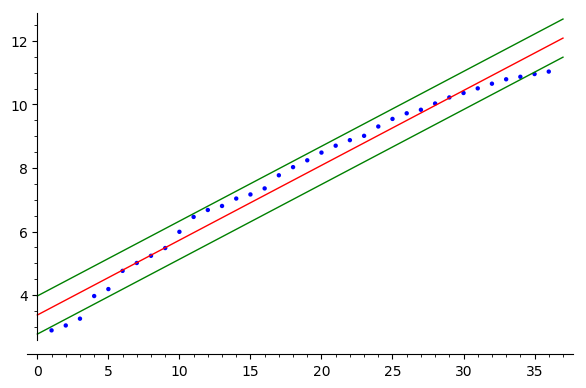

In [10]:
f_lin(x)=c*x+a
infectionsLnExp_de_points=[(n,ln(infections_de[n])) for n in range(1,dataExpNr_de)]
q=find_fit(infectionsLnExp_de_points, f_lin, solution_dict = True)
show(f_lin(a=q[a],c=q[c]))
delta=0.6
list_plot(infectionsLnExp_de_points)+plot(f_lin(a=q[a],c=q[c]), 0, dataExpNr_de, color='red')+plot(f_lin(a=q[a],c=q[c])+delta, 0, dataExpNr_de, color='green')+plot(f_lin(a=q[a],c=q[c])-delta, 0, dataExpNr_de, color='green')

Wie man sieht, verlassen die Logarithmen der kumulierten Infektionszahlen um den Tag 36 (31.3.2020) den Korridor der zufälligen Schwankungen. Dieser Trend setzte sich in den folgenden Tagen fort wie man sehen kann, wenn man die Berechnungen mit `dataExpNr` > 36 wiederholt.

Sehen wir uns die Entwicklung der Modell-Toleranz und der Vorhersage-Toleranz während der exponentiellen Phase an. Wir sehen, dass eine gute Passung des Modells zu den bisher beobachteten Daten kein Garant für eine gute Vorhersage ist. Dies gilt insbesondere in der frühen Phase, als noch relativ wenige Daten vorlagen, als auch gegen Ende der exponentiellen Phase, als das Modell beginnt, seine Passgenauigkeit zu verlieren.

Es könnte sein, dass eine kontinuierliche Verschlechterung der Vorhersagequalität ein Frühindikator dafür ist, dass das Modell an seine Grenzen stößt, auch wenn die bisherige Passung des Modells zu den Daten noch recht gut ist.

Mit dem Schieberegler im folgenden Diagramm können Sie die Werte dadurch glätten, dass jeweils mit dem arithmetischen Mittel der kumulierten Infektionszahlen der letzten $w$ Tage gerechnet wird ($w=0\ldots zh$).

In [11]:
def infMittel(w):
    return [(n,mean(infections_de[n+1-w:n+1])) for n in range(w,dataNr_de)]
def tres(dataP,Tag):
    infectionsTag=dataP[0:Tag+zh+1];
    f_exp(x)=a*e^(c*x)
    q=find_fit(infectionsTag[0:Tag+1], f_exp, solution_dict = True)
    g(x)=f_exp(x,a=q[a],c=q[c])
    return [MT(infectionsTag,g,Tag),VT(infectionsTag,g,Tag+1,zh)]
@interact
def _(w=slider(1,zh,step_size=1,default=1)):
    inf1=infMittel(w)
    mt=[(n,tres(inf1,n)[0]) for n in range(7,dataExpNr_de-zh)]
    vt=[(n,tres(inf1,n)[1]) for n in range(7,dataExpNr_de-zh)]
    show(list_plot(mt,color='blue',legend_label='Modell-Toleranz')+list_plot(vt,color='red',legend_label='Vorhersage-Toleranz'))

Interactive function <function _ at 0x7efd5e6c8ea0> with 1 widget
  w: TransformIntSlider(value=1, description…

### Verdopplungsrate

Am 28.3.2020 [erklärte Kanzleramtschef Braun](https://www.tagesspiegel.de/politik/kanzleramtschef-erteilt-rascher-lockerung-eine-absage-bis-20-april-bleiben-alle-coronavirus-massnahmen-bestehen/25690036.html): 

> Wenn wir es schaffen, die Infektionsgeschwindigkeit so zu verlangsamen, dass wir zehn, zwölf oder noch mehr Tage haben bis zu einer Verdopplung, dann wissen wir, dass wir auf dem richtigen Weg sind.

Wir definieren die Verdopplungsrate zu einem Zeitpunkt $x$ als die kleinste Zahl $d$, so dass die kumulierte Zahl der Infizierten zum Zeitpunkt $x-d$ höchstens halb so groß ist, wie die kumulierte Zahl der Infizierten zum Zeitpunkt $x$. Betrachten wir die Verdopplungsrate in der exponentiellen Phase im März 2020.

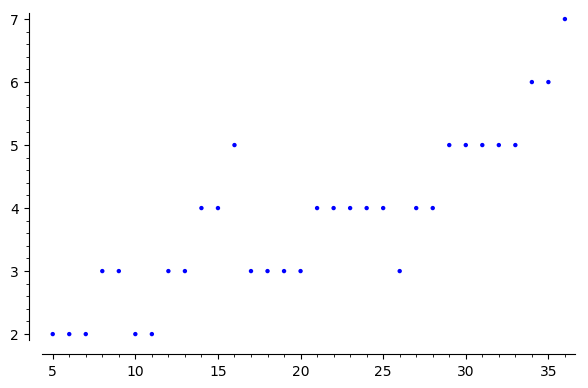

In [12]:
def d(dataP,x):
    xy=dataP[x]
    xd=x
    while 2*dataP[xd]>xy:
        xd=xd-1
    return x-xd
double= [(x,d(infections_de,x)) for x in range(5,dataExpNr_de)]
list_plot(double)

Da die Berechnungen nur taggenau erfolgen können Verzögerungen in der Meldepraxis durchaus zu Sprüngen von $\pm 1$ Tag führen. Wie wir sehen, ist die Verdopplungsrate im März 2020 weit vom Zielwert von 10-12 entfernt, auch wenn ein Anstieg festzustellen ist.

Nun hat jede Exponentialfunktion $e^{kx}$ eine konstante Verdopplungsrate von $\frac{\ln 2}{k}$. Eine Änderung der Verdopplungsrate zeigt also an, dass der Parameter $k$ des exponentiellen Modells angepasst werden muss - bzw. dass das exponentielle Modell an die Grenzen seiner Leistungsfähigkeit stößt.

In der folgenden Aufgabe geht es um die Berechnung der Verdopplungsrate - nicht aufgrund der realen Daten sondern aufgrund des Ende März bestmöglichen exponentiellen Modells. Vergleichen Sie die Ergebnisse mit obigem Diagramm.

<iframe src="https://netmath.vcrp.de/IMathAS/embedq.php?theme=netmath&id=7637" width="100%" height="800px"></iframe>

Wie in dieser Aufgabe berechnen wir die Verdopplungsrate des zu einem Zeitpunkt besten exponentiellen Modells im Laufe des März 2020:

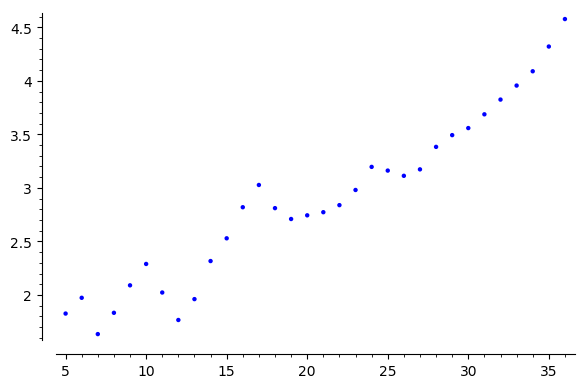

In [13]:
def dExp(dataP,Tag):
    infectionsTag=dataP[0:Tag]
    var('x,a,c')
    f_exp(x)=a*e^(c*x)
    q=find_fit(infectionsTag[0:Tag+1], f_exp, solution_dict = True)
    return (log(2)/q[c]).n()
list_plot([(n,dExp(infections_de_points,n)) for n in range(5,dataExpNr_de)])

Wir bemerken, dass die Entwicklung der Verdopplungsrate der exponentiellen Modelle ein deutlicheres Bild von der Entwicklung der Pandemie vermittelt als die tag-genaue Bestimmung der Verdopplungsrate in den realen Daten, ohne Berücksichtigung der Modelle.

## Logistisches Modell

Ab Anfang April 2020, kann das Wachstum der Zahl der gemeldeten Infektionen immer schlechter durch Exponentialfunktionen beschrieben werden. Das Virus stößt - aus welchen Gründen auch immer - auf Faktoren, die seine Ausbreitung behindern (z.B. Senkung der Reproduktionsrate durch Einschränkung sozialer Kontakte, hoher Grad der Durchseuchung der Bevölkerung).

Solche begrenzenden Faktoren werden im logistischen Modell ([SI-Modell](https://de.wikipedia.org/wiki/SI-Modell)) berücksichtigt. Dieses Modell nimmt an, dass es eine obere Grenze $N$ für die Zahl der Infizierten gibt. Dabei kann $N$ durchaus kleiner als die reale Gesamtbevölkerung sein, denn manche Teile der Bevölkerung kommen z.B. durch Kontaktbeschränkungen, Vorsichtsmaßnahmen oder geographische Beschränkungen nie in Kontakt mit dem Virus. Die Gruppe der für die Virusausbreitung relevanten $N$ Personen wird zu jedem Zeitpunkt $x$ unterteilt in die $I(x)$ infizierten und die $S(x)$ noch infizierbaren (Susceptibles). Damit ist für alle $x$ $S(x)+I(x)=N$ - $S(x)$ ergibt sich für festes $x$ aus $I(x)$ durch $S = N-I$.

Wir bemerken, dass $\frac{S(x)}{N}$ die Wahrscheinlichkeit dafür ist, dass eine zum Zeitpunkt $x$ zufällig ausgewählte Person infizierbar ist. Das logistische Modell nimmt an, dass der Zuwachs an Infektionen in einem kleinen Zeitraum proportional zur Länge des Zeitraums, zur Zahl der zu Beginn Infizierten und zu dieser Wahrscheinlichkeit ist: 

$$I(x+\Delta x) - I(x) = c\cdot \Delta x\cdot\frac{S(x)}{N}\cdot I(x) = c \cdot \Delta x\cdot \frac{N-I(x)}{N}\cdot I(x)$$ 

Daraus ergibt sich für $\Delta x \rightarrow 0$ die logistische Differentialgleichung $$I' = c\cdot\frac{N-I}{N}\cdot I.$$

Die allgemeine [Lösung der logistischen Differentialgleichung](http://statistik.wu-wien.ac.at/~leydold/MOK/HTML/node183.html) wird durch eine logistische Funktion $$I(x)=a\cdot \frac{N}{a+(N-a)\cdot e^{-c x}}$$ beschrieben. Dabei ist $a$ der Anfangswert bei  $x=0$, $N$ ist eine angenommene Sättigungsgrenze, der sich die Zahl der Infizierten asymptotisch annähert (Kapazitätsgrenze) und $c$ ist ein Parameter der die Geschwindigkeit dieser Annäherung beschreibt. 

Das logistische Modell betrachtet alle Infizierten als infektiös, berücksichtigt also Todesfälle und Immunität nicht. Dies erfolgt im verfeinerten SIR-Modell.

### Zahl der Infektionen

Versuchen Sie in der folgenden Aufgabe mit Hilfe der Schieberegler eine logistische Funktion zu finden, die möglichst genau zu den Daten passt, die den Verlauf der Epidemie in der VR China im Januar 2020 darstellen.

In der Literatur werden unterschiedliche Bezeichnungen verwendet; so werden unsere Konstanten $N,c$ in der folgenden Aufgabe mit $S,k\cdot S$ bezeichnet.

<iframe src="https://netmath.vcrp.de/IMathAS/embedq.php?theme=netmath&id=7632" width="100%" height="800px"></iframe>


Versuchen wir nun automatisch eine logistische Funktion für die Entwicklung der COVID-19-Pandemie in Deutschland zu bestimmen, welche die Zahl der Infizierten bis Ende März (Tag 67) möglichst gut beschreibt. Als Startwerte für die Regression nehmen wir $a=400$ und $k=0.14$, was den Koeffizienten des exponentiellen Modells Ende März entspricht und $S=2 000 000$, was von der Größenordnung her plausibel erscheint.

Mit den Schiebereglern können Sie die Startwerte ändern. Die Startfunktion wird grün dargestellt, das Ergebnis der logistischen Regression in rot.

In [14]:
Tag=67
infectionsTag67=infections_de_points[5:Tag+1]
@interact
def _(a0=slider(100,1000,default=400,step_size=100),N0=slider(150000,250000,default=200000,step_size=10000),c0=slider(0.1,0.2,default=0.14,step_size=0.01)):
    var('a,N,c,x')
    f_log(a,N,c,x)=a*N/(a+(N-a)*e^(-c*x))
    q=find_fit(infectionsTag67, f_log, variables=[x],parameters=[a,N,c],initial_guess=(a0,N0,c0),solution_dict = True)
    list_plot(infectionsTag67)
    show(list_plot(infectionsTag67)+plot(f_log(a=a0,N=N0,c=c0), 5, Tag,color='green')+plot(f_log(a=q[a],N=q[N],c=q[c]), 5, Tag,color='red'))

Interactive function <function _ at 0x7efd5e6c88c8> with 3 widgets
  a0: TransformIntSlider(value=400, descrip…

Wie für das exponentielle Modell können nun für jeden Tag (grün) Modell- und Vorhersage-Toleranz des optimalen logistischen Modells (rot) berechnen.

**Frage:** Wie verhalten sich Toleranzen des logistischen Modells und des exponentiellen Modells (s.o.) in der exponentiellen Phase (also vor Tag 36) zueinander?

In [15]:
dataLogNr_de=dataNr_de
@interact
def _(Tag=slider(7,dataLogNr_de,default=50,step_size=1)):
    infectionsTag=infections_de_points[0:Tag+zh+1]
    var('a,N,c,x')
    f_log(a,N,c,x)=a*N/(a+(N-a)*e^(-c*x))
    q=find_fit(infectionsTag67, f_log, variables=[x],parameters=[a,N,c],initial_guess=(400,200000,0.14),solution_dict = True)
    g(x)=f_log(a=q[a],N=q[N],c=q[c])
    show("a=",q[a]," N=",q[N]," c=",q[c])
    show("Modell-Toleranz:",MT(infectionsTag,g,Tag))
    show("Vorhersage-Toleranz:",VT(infectionsTag,g,Tag+1,zh))
    show(list_plot(infectionsTag)+plot(g, 0, Tag+zh, color='red')+line([(Tag,0),(Tag,g(Tag))],color='green'))

Interactive function <function _ at 0x7efd5e637400> with 1 widget
  Tag: TransformIntSlider(value=50, descript…

Das folgende Diagramm stellt die Entwicklung der Modell- und Vorhersage-Toleranz für das SI-Modell nach dem Ende der exponentiellen Phase bis Ende Juni 2020 dar. Mit dem Regler $w=0\ldots zh$ kann bestimmt werden, ob mit den Original-Infektionszahlen ($w=1$) oder mit dem gleitenden Durchschnitt der letzten $w$ Tage gerechnet wird.

In [16]:
def tresLog(dataP,Tag):
    infectionsTag=dataP[0:Tag+zh+1];
    var('a,N,c,x')
    f_log(a,N,c,x)=a*N/(a+(N-a)*e^(-c*x))
    q=find_fit(infectionsTag67, f_log, variables=[x],parameters=[a,N,c],initial_guess=(400,200000,0.14),solution_dict = True)
    g(x)=f_log(a=q[a],N=q[N],c=q[c])
    return [MT(infectionsTag,g,Tag),VT(infectionsTag,g,Tag+1,zh)]
@interact
def _(w=slider(1,zh,step_size=1,default=1)):
    inf1=infMittel(w)
    mt=[(n,tresLog(inf1,n)[0]) for n in range(37,dataNr_de-zh-1)]
    vt=[(n,tresLog(inf1,n)[1]) for n in range(37,dataNr_de-zh-1)]
    show(list_plot(mt,color='blue',legend_label='Modell-Toleranz')+list_plot(vt,color='red',legend_label='Vorhersage-Toleranz'))

Interactive function <function _ at 0x7efd5e637730> with 1 widget
  w: TransformIntSlider(value=1, description…

Wie wir sehen, erreicht das logistische Modell um Tag 64 (28.4.2020) mit Modell- und Vorhersage-Toleranzen von etwa 3.3% seine maximale Leistungsfähigkeit bei einem  3-Tages-Horizont für die Vorhersagen. 

Bis zu diesem Zeitpunkt ist die Vorhersage-Toleranz sogar besser, als die Modell-Toleranz. Wir können dies dadurch erklären, dass sich das Verhalten der Pandemie von Tag zu Tag besser durch ein logistisches Modell beschreiben lässt.

### Verdopplungsraten

Sehen wir uns zunächst die realen Verdopplungszahlen an, d.h. wir bestimmen für die Zeit nach der exponentiellen Phase zu jedem Tag x wie viele Tage vorher die kumulierten Infektionszahlen halb so hoch waren. Die grüne Linie zeigt die angestrebte Verdopplungsrate von 11.

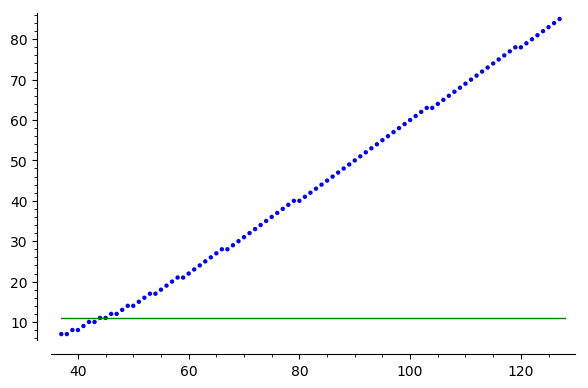

In [17]:
doubleL= [(x,d(infections_de,x)) for x in range(dataExpNr_de,dataNr_de)]
list_plot(doubleL)+plot(11,x,dataExpNr_de,dataNr_de,color='green')

Die Verdopplungsrate von 11 Tagen wird am Tag 44 (8.4.2020) erreicht. Wir beobachten eine kontinuierlichere - sogar fast lineare -Entwicklung als in der exponentiellen Phase. Dies wird noch deutlicher, wenn man den Beginn des dargestellten Zeitraums `dataExpMr_de` etwa durch 5 ersetzt.

Wie für Exponentialfunktionen können wir auch für logistische Funktionen $L(x)=a \frac{N}{a+(N-a)e^{-cx}}$ eine Verdopplungsrate berechnen. Gesucht wird dafür zu gegebenem x ein Wert $d$, so dass $L(x-d)=\frac{1}{2}L(x)$. Dieser Wert $d$ hängt natürlich von $a,S,c$ ab.

SageMath liefert uns eine Lösung für diese Gleichung und damit für die Verdopplungsrate des jeweiligen logistischen Modells:

In [18]:
var('x,a,k,N,d,D')
L(a,N,c,x)=a*N/(a+(N-a)*e^(-c*x))
ss(a,N,c)=solve(L(a,N,c,x-d) == 0.5*L(a,N,c,x),d)
d(a,N,c,x)=ss[0].rhs().simplify_full()
show(LatexExpr("d(a,N,c,x)="),d(a,N,c,x))

d(a,N,c,x)= (c*x + log((a*e^(c*x) + 2*N - 2*a)*e^(-c*x)/(N - a)))/c

Damit könnte man versuchen, die Verdopplungsrate für die Zukunft vorherzusagen. Es ist jedoch zu erwarten, dass im Falle der COVID-19-Pandemie eine einfache lineare Regression der realen Verdopplungsraten ein besseres Ergebnis liefert, als es logistische Modelle mit ihrer schließlich wachsenden Modell- und Vorhersage-Toleranz liefern könnten. Wir  verzichten deshalb darauf, dies weiter zu untersuchen.

## SIR-Modell

Das SIR-Modell unterscheidet sich vom exponentiellen und logistischen (SI-)Modell dadurch, dass es Genesene und Verstorbene berücksichtigt und davon ausgeht, dass diese nicht mehr infektiös sind. Wir fassen Genesene und verstorbene in der Gruppe $R$ (recovered) zusammen. Die Größe dieser Gruppe zum Zeitpunkt $x$ bezeichnen wir mit $R(x)$.

Das SIR-Modell versucht, Funktionen zu berechnen, die
<ul>
    <li>die Zahl der Infektiösen $I_{SIR}$</li>
    <li>die Zahl der Infizierbaren $S_{SIR}$ und</li>
    <li>die Zahl der Genesenen bzw. Verstorbenen $R_{SIR}$
</ul>
beschreiben. Es gilt also für die im exponentiellen und logistischen Modell approximierte kumulative Zahl der Infizierten $I=I_{SIR}+R_{SIR}$ bzw. $I_{SIR}=I-R_{SIR}$. Die Zahl der Verstorbenen und Genesenen haben wir zu Beginn in die Variablen `deadsAll_de` bzw. `recoveredAll_de` abgespeichert und können damit nun auch $R_{SIR},I_{SIR}$ berechnen:

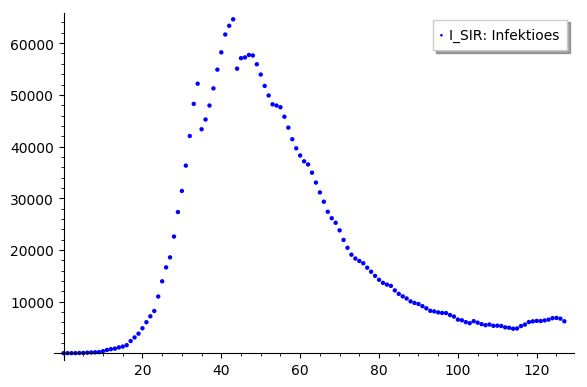

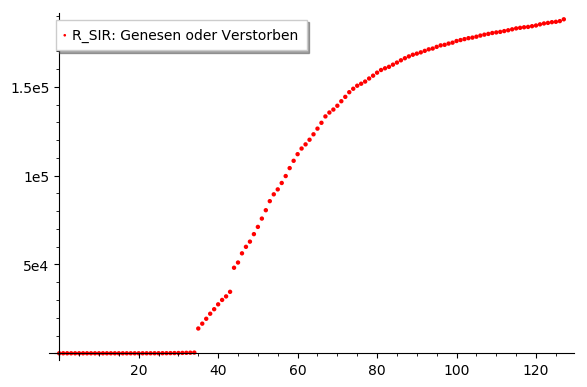

In [46]:
R_SIR=[(n,deadsAll_de[n]+recoveredAll_de[n]) for n in range(0,dataNr_de)]
I_SIR=[(n,infections_de[n]-R_SIR[n][1]) for n in range(0,dataNr_de)]
md(u"$R_{SIR}$ und $I_{SIR}$ berechnet")
show(list_plot(I_SIR,color='blue',legend_label='I_SIR: Infektioes'))
show(list_plot(R_SIR,color='red',legend_label='R_SIR: Genesen oder Verstorben'))

Die Berechnung der Zahl der Infizierbaren $S_{SIR}=N-I_{SIR}-R_{SIR}$ ist leider nicht unmittelbar möglich, da sie vom Parameter $N$ des Modells abhängt, der zunächst nicht bekannt ist.

In [40]:
def S_SIR(N):
    return [(n,N-I_SIR[n][1]-R_SIR[n][1]) for n in range(0,dataNr_de)]
html("Funktion $S_{SIR}(N)$ definiert")

Funktion <script type="math/tex">S_{SIR}(N)</script> definiert

Das SIR-Modell nimmt an, dass die Zahl der in einem kurzen Zeitraum Genesenen oder Verstorbenen proportional zur vergangenen Zeit und zur Zahl der Infizierten ist: $$R_{SIR}(x+\Delta x)-R_{SIR}(x) = w \cdot \Delta x\cdot I_{SIR}(x)$$

Daraus ergibt sich die Differentialgleichung $${R'}_{SIR}= w\cdot I_{SIR}$$

Wir bemerken, dass bei dieser Annahme nicht berücksichtigt wird, dass Genesung bzw. Versterben erst mehrere Tage (10-14 Tage) nach (Registrierung der) Infektion eintreten, so dass eher von einer Proportionalität mit $I_{SIR}(x-10)$ auszugehen wäre. Dies wird im SIR-Modell aber nicht berücksichtigt. 

Die Veränderung der Anzahl der Infizierten ergibt sich aus der Zahl der Neuinfektionen, die wie im SI-Modell berechnet wird, vermindert um die Zahl der in diesem Zeitraum Genesenen bzw. Verstorbenen: $$I_{SIR}(x+\Delta x) -I_{SIR}(x) = \Delta x\cdot c \cdot\frac{S_{SIR}(x)}{N}\cdot I_{SIR}(x)-(R_{SIR}(x+\Delta x)-R_{SIR}(x))$$ woraus sich für $\Delta x \rightarrow 0$ die Differentialgleichung $${I'}_{SIR}=c\cdot\frac{S_{SIR}}{N}\cdot I_{SIR}-{R'}_{SIR}=c\cdot\frac{S_{SIR}}{N}\cdot I_{SIR}-w\cdot I_{SIR}$$ ergibt.

Aus diesen beiden Differentialgleichungen und dem Fakt, dass die Anzahl der Infizierten, Genesenen bzw. Verstorbenen und Infizierbaren als konstant gleich $N$ angenommen wird ergibt sich schließlich die dritte Differentialgleichung $${S'}_{SIR} = -c \frac{S_{SIR}}{N} I_{SIR}$$

Wir bemerken, dass das SI-Modell der Spezialfall des SIR-Modells mit der Genesungsrate $w=0$ ist.

Wir speichern die rechten Seiten des SIR-Differentialgleichungssystems

${S'}_{SIR} = -c \frac{S_{SIR}}{N} I_{SIR}$

${I'}_{SIR}=c\cdot\frac{S_{SIR}}{N}\cdot I_{SIR}-w\cdot I_{SIR}$

${R'}_{SIR}= w\cdot I_{SIR}$

in der Funktion `DGL_right` ab, die von den Parametern $N,c,w$ abhängt:

In [35]:
I,R,S,x = var('I R S x')
def DGL_right(N,c,w):
     return [-c*(S/N)*I,c*(S/N)*I -w*I,w*I]
html("Differentialgleichungssystem definiert")

Differentialgleichungssystem definiert

Leider lässt sich diese Differentialgleichungssystem nicht in geschlossener Form lösen, so dass wir mit numerischen Näherungslösungen vorlieb nehmen müssen. SageMath stellt uns dafür die Funktion `desolve_system_rk4` zur Verfügung, die Differentialgleichungssysteme numerisch mit dem [Runge-Kutta-Verfahren](https://de.wikipedia.org/wiki/Klassisches_Runge-Kutta-Verfahren) löst. 

Dabei werden die Anfangswerte zum Beginn einer zu untersuchenden Periode vorgegeben und das Runge-Kutta-Verfahren berechnet schrittweise den Verlauf der Lösungen des Differentialgleichungssystems während dieser Periode. Um Datenreihen für die Lösung des SRI-Differentialgleichungssystems ab einem Tag $x_0$ zu berechnen benötigen wir also
<ul>
    <li>Werte für die Parameter $N,c,w$ des Differentialgleichungssystems und</li>
    <li>Anfangswerte $i_0=I_{SRI}(x_0),r_0=R_{SRI}(x_0),s_0=S_{SRI}(x_0)$.</li>
</ul>
Außerdem benötigen wir $x_0$ als Start der Periode, das Ende der Periode und die Schrittweite für die $x$-Werte, für die die Lösung berechnet werden soll.

In [48]:
def SIR_solve(N,c,w,Ics,Start,End,Step):
    sol=desolve_system_rk4(DGL_right(N,c,w), [S,I,R], ics=Ics, ivar=x, end_points=[Start,End], step=Step)
    S_sol=[(s[0],s[1]) for s in sol]
    I_sol=[(s[0],s[2]) for s in sol]
    R_sol=[(s[0],s[3]) for s in sol]
    return [S_sol,I_sol,R_sol]
html('L&ouml;sung des DGL-Systems definiert')

L&ouml;sung des DGL-Systems definiert

Berechnen wir als Erstes einmal eine Lösung für den Tag $x_0=64$ (28.4.2020), den Tag der besten Passung des logistischen Modells. Die logistische Regression lieferte für diesen Tag $N_0=157086.77914178697, c_0=0.14679874435677764$. Für $w_0$ wählen wir - angeregt durch die dritte Differentialgleichung unseres System $w_0=\frac{R_{SIR}(x_0+1)-R_{SIR}(x_0)}{I_{SIR}(x_0)}$.
Als Anfangswerte wählen wir $I_0=I_{SIR}(x_0),R_0=R_{SIR}(x0),S_0=N_0-R_0-I_0$.

In [23]:
x0=64; N0=157086.77914178697; c0=0.14679874435677764
w0=(R_SIR[x0+1][1]-R_SIR[x0][1])/I_SIR[x0][1]
print("w0=",w0)
I0=I_SIR[x0][1];R0=R_SIR[x0][1];S0=N0-I0-R0
print("I0=",I0," R0=",R0," S0=",S0)

w0= 0.0969597868217054
I0= 33024.0000000000  R0= 123313.000000000  S0= 749.779141786974


**Was dabei auffällt:** Der berechnete Wert $S_0$ von etwa 750 noch zu infizierenden ist - verglichen mit den Werten für $I_0,R_0$ - sehr klein. Dies könnte darauf hindeuten, dass $N_0$ zu klein gewählt ist.

**Aufgabe:** Versuchen Sie, mit dem Schieberegler einen Wert für $N_0$ zu finden, der zu einer möglichst guten Approximation der realen Zahl der Infizierten führt.

In [41]:
@interact
def _(N1=slider(150000,300000,step_size=10000,default=150000,label="N0")):
    global N0
    N0=N1
    sol0=SIR_solve(N1,c0,w0,[x0,N1-I0-R0,I0,R0],x0,dataNr_de,1)
    show(list_plot(sol0[1],color='red',plotjoined=True,legend_label="Infiziert - berechnet")+list_plot(I_SIR[x0+1:dataNr_de],color='blue',legend_label="Infiziert - real"))

Interactive function <function _ at 0x7efd5a43f268> with 1 widget
  N1: TransformIntSlider(value=150000, descr…

Da das Runge-Kutta-Verfahreneine Datenreihe, keine Funktion, liefert (auch wenn wir dies hier durch eine Kurve darstellen), müssen wir unser Toleranzmaß neu definieren, wobei Funktionswerte durch die Daten ersetzt werden:

In [49]:
# Definition Residuum
# Es wird vorausgesetzt, dass dataP und dataQ Reihen von Punkten (i,_) der selben Länge für die selben Werte i sind
def R2D(dataP,dataQ):
    return (vector([(dataP[i][1]-dataQ[i][1]) for i in range(0,len(dataP))]).norm().n())^2
#Definition Residuum mit relativem Fehler
def rR2D(dataP,dataQ):
    return vector(RR,[(dataP[i][1]-dataQ[i][1]) for i in range(0,len(dataP))]).norm()/vector(RR,[dataP[i][1] for i in range(0,len(dataP))]).norm()
def rR3D(dataP,dataQ,x0,x1):
    return rR2D(dataP[x0:x1+1],dataQ[x0:x1+1])
#Definition Modell-Toleranz
def MTD(dataP,dataQ,x):
    return rR3D(dataP,dataQ,0,x)
#Definition Vorhersage-Toleranz
def VTD(dataP,dataQ,x,z):
    return rR3D(dataP,dataQ,x,x+z)
html("Residuen sind f&uuml;r Datenreihen definiert")

Residuen sind f&uuml;r Datenreihen definiert

Da das Runge-Kutta-Verfahren historische Werte vor den Anfangswerten nicht approximiert, macht die Berechnung der Modell-Toleranz keinen Sinn. Wir berechnen stattdessen die Vorhersage-Toleranz für die Zeit von Tag 64 bis Tag 104 für die drei Datenreihen, die mit Hilfe des Runge-Kutta-Verfahrens gefunden werden.

In [50]:
html("Wir verwenden daf&uuml;r den von Ihnen gefundenen Wert $N_0=$%i. Passen Sie diesen Wert ggf. mit dem obigen Schieberegler an und berechnen Sie die folgende Zelle neu."%(N0))

Wir verwenden daf&uuml;r den von Ihnen gefundenen Wert <script type="math/tex">N_0=</script>200000. Passen Sie diesen Wert ggf. mit dem obigen Schieberegler an und berechnen Sie die folgende Zelle neu.

Vorhersage-Toleranz für Infizierte (Tag 64-104):0.207462


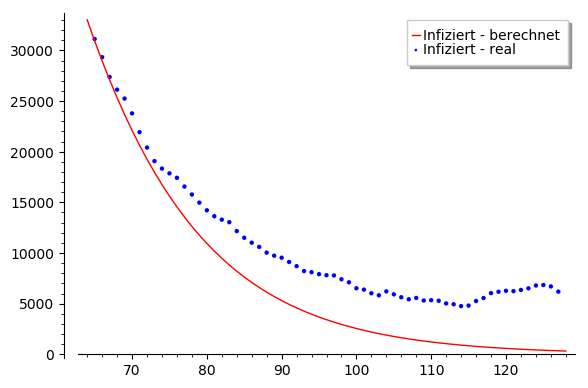

Vorhersage-Toleranz für Genesene/Verstorbene (Tag 64-104):0.037835


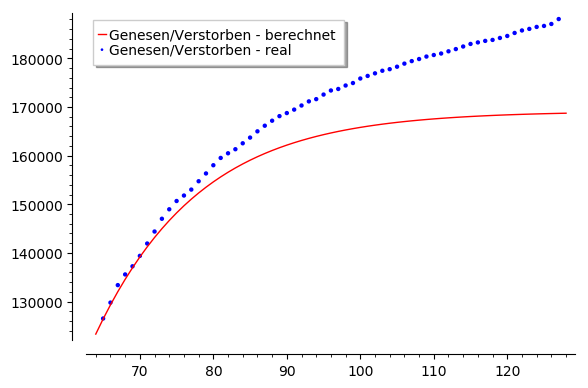

Vorhersage-Toleranz für Infizierbare (Tag 64-104):0.331696


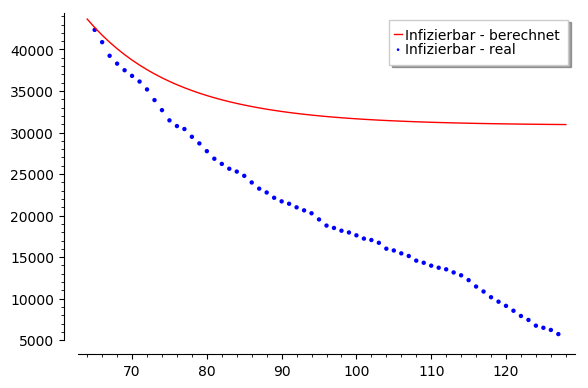

Maximale Voehersage-Toleranz: 0.331696

In [51]:
sol1=SIR_solve(N0,c0,w0,[x0,N0-I0-R0,I0,R0],x0,dataNr_de,1)
solI=sol1[1]
tolI=VTD(I_SIR[x0:],solI,0,104-x0)
print(u"Vorhersage-Toleranz für Infizierte (Tag %i-%i):%f"%(x0,104,tolI))
show(list_plot(sol1[1],color='red',plotjoined=True,legend_label="Infiziert - berechnet")+list_plot(I_SIR[x0+1:dataNr_de],color='blue',legend_label="Infiziert - real"))
solR=sol1[2]
tolR=VTD(R_SIR[x0:],solR,0,104-x0)
print(u"Vorhersage-Toleranz für Genesene/Verstorbene (Tag %i-%i):%f"%(x0,104,tolR))
show(list_plot(solR,color='red',plotjoined=True,legend_label="Genesen/Verstorben - berechnet")+list_plot(R_SIR[x0+1:dataNr_de],color='blue',legend_label="Genesen/Verstorben - real"))
solS=sol1[0]
tolS=VTD(S_SIR(N0)[x0:],solS,0,104-x0)
print(u"Vorhersage-Toleranz für Infizierbare (Tag %i-%i):%f"%(x0,104,tolS))
show(list_plot(solS,color='red',plotjoined=True,legend_label="Infizierbar - berechnet")+list_plot(S_SIR(N0)[x0+1:dataNr_de],color='blue',legend_label="Infizierbar - real"))
maxTol=max(tolI,tolR,tolS)
html("Maximale Vorhersage-Toleranz: %f"%(maxTol))

Wenn Sie mit unterschiedlichen Werten für $N_0$, bzw. allgemein mit unterschiedlichen Parametern $N,c,w$ für das SRI-Differentialgleichungssystem experimentieren so werden Sie bemerken, dass sich bei manchen Änderungen der Parameter die Vorhersage-Toleranz für eine der Datenreihen verbessert, während sie sich für eine andere verschlechtert. Somit ist es vom Ziel der Analyse abhängig, wie man ein Maß für die Qualität eines konkreten SIR-Modells definieren wird.

# Fazit

Wir haben gesehen, dass die COVID-19-Pandemie sich in Deutschland 2020 in mehreren Phasen entwickelt hat, in denen Sie sich durch unterschiedliche mathematische Modelle mehr oder weniger gut beschreiben lässt.

* In der ersten Phase, etwa bis Ende März erfolgt die Ausbreitung des Virus im Wesentlichen ungehemmt, so dass sie sich am Besten mit einem exponentiellen Modell beschreiben lässt.
* In der zweiten Phase, die etwa bis Anfang Mai 2020 geht, wird die Ausbreitung des Virus gehemmt - das SI-Modell erweist sich als optimal zur Beschreibung der Situation.
* Die dritte Phase umfasst den Zeitraum von Anfang Mai bis Mitte Juni 2020. Die Lockdown-Maßnahmen wirken, Infektionsketten werden unterbrochen, immer mehr Personen scheiden nach überstandener Krankheit aus dem Infektionsgeschehen aus. Jetzt kann das SIR-Modell die Entwicklung am Besten beschreiben.
* Schließlich werden in Phase 4 Lockdown-Maßnahmen gelockert, das Infektionsgeschehen ist örtlich sehr unterschiedlich. Damit verlieren Deutschland-weite Modelle an Bedeutung; andere Modelle, insbesondere zur Modellierung der räumlichen Ausbreitung des Virus, gewinnen an Bedeutung.

Wir haben auch gesehen, wie Modelle altern. Um die Vorhersagequalität eines Modells zu erhalten ist es erforderlich, seine Parameter kontinuierlich anzupassen - solange wie dies möglich ist und kein kein besseres Modell zur Verfügung steht.

# Ausblick

Dieses Notebook stellt notwendigerweise eine subjektive Auswahl der Möglichkeiten und Ansätze zur Modellierung einer Pandemie dar. So gibt es auch viele ebenso berechtigte Möglichkeiten zur Analyse der Pandemie-Daten, die sich durch Erweiterung und/oder Modifikation dieses Notebooks implementieren lassen. Hier einige Anregungen.
* Analyse der Todesfallzahlen, deren Daten in der Variablen `deadsAll_de` zur Verfügung stehen
* Regression der Parameter des SIR-Modells zur Modell-Optimierung
* Analyse der Entwicklung der für den jeweiligen Tag optimierten Modell-Parameter

So möge dieses Notebook vor allem Anregung zu eigener aktiver Beschäftigung mit mathematischen Modellen sein.